In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pn_da
import numpy as nm_py
import matplotlib.pyplot as pl_ot
import seaborn as se_brn

# For Pre-Processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# Library to work on the Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Library for Metric Calculation
from sklearn.metrics import accuracy_score, classification_report

# Binary

In [ ]:
bin_data = pn_da.read_csv('/content/drive/MyDrive/My Project/Data/DOSSPRE 2.0Binary.csv', encoding='latin-1')

In [ ]:
bin_data.head()

,Project ID,Class,Requirement
0,1,SR,'The system shall detect SQL Injection and XSS...
1,1,NSR,'The system shall analyze the detected vulnera...
2,1,NSR,'The system shall identify acceptable low fals...
3,1,NSR,'The system shall inspect SSL certificate '
4,1,NSR,'The system shall generate a report of the det...


In [ ]:
bin_data.shape

(1316, 3)

In [ ]:
bin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Project ID   1316 non-null   int64 
 1   Class        1316 non-null   object
 2   Requirement  1316 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


In [ ]:
bin_data['Class'].unique()

array(['SR', 'NSR'], dtype=object)

In [ ]:
# Task 1: Remove trailing spaces in the dataset
bin_data = bin_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Task 2: Quote all text in the "Requirements" field using a custom format
bin_data['Requirement'] = bin_data['Requirement'].apply(lambda x: f"'{x}'")

In [ ]:
bin_class = bin_data['Class'].value_counts()

In [ ]:
print(bin_class.values)

[802 514]


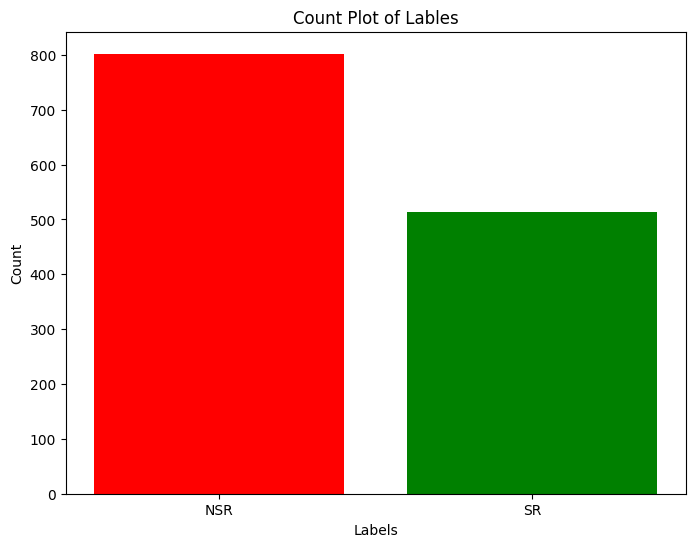

In [ ]:
pl_ot.figure(figsize=(8,6))
colors = ['Red', 'Green']
pl_ot.bar(bin_class.index,bin_class.values, color= colors)
pl_ot.xlabel('Labels')
pl_ot.ylabel('Count')
pl_ot.title('Count Plot of Lables')
pl_ot.plot();

In [ ]:
X = bin_data['Requirement']
Y = bin_data['Class']

- TF-IDF vectorization is used to extract text features in this code. Natural language processing uses TF-IDF to express text input as numerical characteristics for machine learning models. This code uses scikit-learn's TfidfVectorizer class to initialise a TF-IDF vectorizer with 300 features. X_tfidf is a TF-IDF matrix created by fitting and transforming X. This matrix rows represent documents or text samples and columns indicate chosen characteristics. Machine learning models may efficiently use text data since each term's TF-IDF score indicates its value in the document relative to the corpus.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=300)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_re, Y_re = over_sampler.fit_resample(X_tfidf, Y)

In [ ]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_re, Y_re, test_size=0.2, random_state=41)

- First Algorithm - Logistic Regression

- This code provides binary logistic regression classification. It utilises scikit-learn's LogisticRegression class with C=0.5 regularisation. The classifier is trained on X_trn and Y_trn and used to predict test data, resulting in y_bin_log_pred. The code then generates and outputs the model's prediction accuracy score and categorization report. The classification report evaluates the classifier's performance on test data using precision, recall, F1-score, and support for both classes.

In [ ]:
lg_reg = LogisticRegression(C=0.5)
lg_reg.fit(X_trn, Y_trn)

LogisticRegression(C=0.5)

In [ ]:
y_bin_log_pred = lg_reg.predict(X_tst)

accu_bin_log = accuracy_score(Y_tst, y_bin_log_pred)
print("Accuracy:", accu_bin_log)

Accuracy: 0.794392523364486


In [ ]:
bin_clrp_log = classification_report(Y_tst, y_bin_log_pred)
print('Classification Report for Logistic Regression\n', bin_clrp_log)

Classification Report for Logistic Regression
               precision    recall  f1-score   support

         NSR       0.76      0.84      0.79       152
          SR       0.84      0.76      0.80       169

    accuracy                           0.79       321
   macro avg       0.80      0.80      0.79       321
weighted avg       0.80      0.79      0.79       321



- Second Algorithm - Multi Nomial Naive bayes

- For binary classification, this code section uses Multinomial Naive Bayes. It uses scikit-learn's MultinomialNB class with alpha = 0.9 and fit_prior = False. The model is trained on training data and used to predict test data . The code reports the model's prediction accuracy score using accuracy_score. Classification_report provides a complete assessment of the Multinomial Naive Bayes classifier's performance on the test data, including precision, recall, F1-score, and support for both classes.

In [ ]:
MNB = MultinomialNB(alpha=0.9, fit_prior=False)
MNB.fit(X_trn, Y_trn)

MultinomialNB(alpha=0.9, fit_prior=False)

In [ ]:
y_bin_pred_MNB = MNB.predict(X_tst)

accu_bin_mnb = accuracy_score(Y_tst, y_bin_pred_MNB)
print("Accuracy:", accu_bin_mnb)

Accuracy: 0.794392523364486


In [ ]:
bin_clrp_MNB = classification_report(Y_tst, y_bin_pred_MNB)
print('Classification Report for MUltinomial Naive Bayes\n', bin_clrp_MNB)

Classification Report for MUltinomial Naive Bayes
               precision    recall  f1-score   support

         NSR       0.78      0.79      0.78       152
          SR       0.81      0.80      0.80       169

    accuracy                           0.79       321
   macro avg       0.79      0.79      0.79       321
weighted avg       0.79      0.79      0.79       321



# Multi Data

In [ ]:
multi_data = pn_da.read_csv('/content/drive/MyDrive/My Project/Data/DOSSPRE 3.0Multi-class.csv', encoding= 'latin-1')

In [ ]:
multi_data.head()

,Project ID,Class,Requirement
0,1,IND,'The system shall detect SQL Injection and XSS...
1,1,NSR,'The system shall analyze the detected vulnera...
2,1,NSR,'The system shall identify acceptable low fals...
3,1,NSR,'The system shall inspect SSL certificate '
4,1,NSR,'The system shall generate a report of the det...


In [ ]:
multi_data.shape

(1316, 3)

In [ ]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Project ID   1316 non-null   int64 
 1   Class        1316 non-null   object
 2   Requirement  1316 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB


In [ ]:
multi_data['Class'].unique()

array(['IND', 'NSR', 'CON', 'INT', 'MAI', 'AVA', 'AUD', 'IMM', 'THE',
       'THO', 'SUR'], dtype=object)

In [ ]:
# Task 1: Remove trailing spaces in the dataset
multi_data = multi_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Task 2: Quote all text in the "Requirements" field using a custom format
multi_data['Requirement'] = multi_data['Requirement'].apply(lambda x: f"'{x}'")

In [ ]:
multi_class = multi_data['Class'].value_counts()

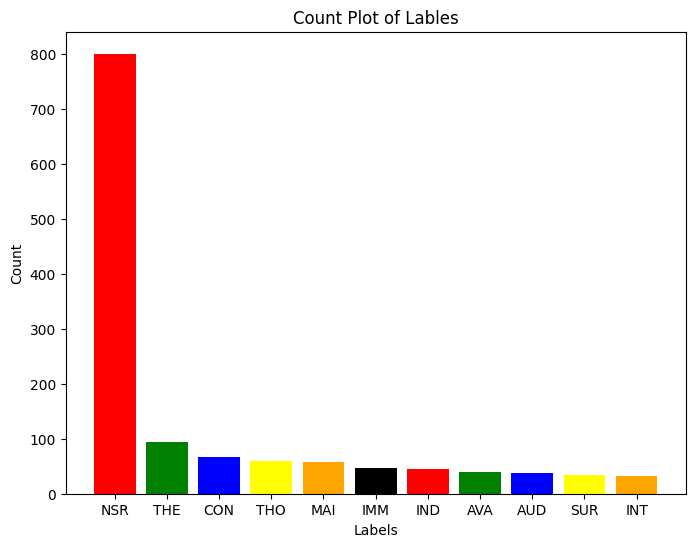

In [ ]:
pl_ot.figure(figsize=(8,6))
colors = ['Red', 'Green', 'blue', 'yellow','orange', 'black',]
pl_ot.bar(multi_class.index,multi_class.values, color= colors)
pl_ot.xlabel('Labels')
pl_ot.ylabel('Count')
pl_ot.title('Count Plot of Lables')
pl_ot.plot();

In [ ]:
X_multi = multi_data['Requirement']
Y_multi = multi_data['Class']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=300)  # You can adjust max_features
X_tfidf_multi = tfidf_vectorizer.fit_transform(X_multi)

In [ ]:
over_sampler_multi = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_rem, Y_rem = over_sampler_multi.fit_resample(X_tfidf_multi, Y_multi)

In [ ]:
X_multi_trn, X_multi_tst, Y_multi_trn, Y_multi_tst = train_test_split(X_rem, Y_rem, test_size=0.2, random_state=41)

- First Model - Logistic Regression

In [ ]:
lg_reg = LogisticRegression(max_iter=10 )
lg_reg.fit(X_multi_trn, Y_multi_trn)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [ ]:
Y_multi_pred = lg_reg.predict(X_multi_tst)

In [ ]:
multi_acc = accuracy_score(Y_multi_tst,Y_multi_pred)
print(multi_acc)

0.8508224617129893


In [ ]:
multi_crp = classification_report(Y_multi_tst,Y_multi_pred,zero_division=1)
print(multi_crp)

              precision    recall  f1-score   support

         AUD       0.96      0.72      0.82       162
         AVA       0.87      0.92      0.90       159
         CON       0.93      0.80      0.86       172
         IMM       0.94      0.77      0.85       134
         IND       0.85      0.99      0.91       159
         INT       0.99      0.89      0.93       150
         MAI       0.87      0.92      0.89       162
         NSR       0.77      0.60      0.67       168
         SUR       0.88      0.94      0.91       178
         THE       0.75      0.88      0.81       150
         THO       0.69      0.93      0.79       169

    accuracy                           0.85      1763
   macro avg       0.86      0.85      0.85      1763
weighted avg       0.86      0.85      0.85      1763



- Second Model -  SVC

In [ ]:
svc_classifier = SVC(C=0.05, kernel='rbf', random_state=42)
svc_classifier.fit(X_multi_trn, Y_multi_trn)


SVC(C=0.05, random_state=42)

In [ ]:
Y_pred = svc_classifier.predict(X_multi_tst)

In [ ]:
accu_svm = accuracy_score(Y_multi_tst,Y_pred)
classification_report_result = classification_report(Y_multi_tst,Y_pred)

In [ ]:
print(f"Accuracy: {accu_svm}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8366420873511061
Classification Report:
               precision    recall  f1-score   support

         AUD       0.96      0.79      0.87       162
         AVA       0.96      0.91      0.93       159
         CON       0.96      0.80      0.87       172
         IMM       0.64      1.00      0.78       134
         IND       0.98      0.96      0.97       159
         INT       0.93      0.91      0.92       150
         MAI       0.94      0.73      0.83       162
         NSR       0.48      0.75      0.59       168
         SUR       1.00      0.85      0.92       178
         THE       0.84      0.82      0.83       150
         THO       0.89      0.73      0.80       169

    accuracy                           0.84      1763
   macro avg       0.87      0.84      0.85      1763
weighted avg       0.87      0.84      0.85      1763

